# 2D Ising Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import ProgressBar

In [2]:
def random_state(shape):
    return np.random.randint(0,2,shape)*2 - 1

## Need to change 1D code into 2D version!

In [3]:
# define the ising model metropolis step function here
def metropolis_step(state, kT, j, b, nSteps=1):
    for _ in range(nSteps):
        N, M = state.shape #len(state), len(state[0])
        idx, idy = np.random.randint(N), np.random.randint(M)
        deltaE = 2*state[idx,idy]*b + 2*j*state[idx,idy]*(state[(idx-1) % N,idy] + state[(idx+1) % N,idy]
                                                     +state[idx,(idy-1) % M] + state[idx,(idy+1)%M])
        if deltaE < 0 or np.random.uniform() < np.exp(-deltaE/kT):
            state[idx,idy] *= -1

In [4]:
def energy(state, j, b):
    return -b*np.sum(state) -j*np.sum(state*(np.roll(state,1,axis=0) + np.roll(state,1,axis=1)))

In [7]:
def avg_mag(kT, j, b, N=100, Nsamples=1000, chunk_size=100):
    mags = np.zeros(Nsamples)
    ens = np.zeros(Nsamples)
    for i in range(Nsamples):
        if i % chunk_size == 0:
            s = random_state((N,N))
        metropolis_step(s, kT, j, b, N**2) # burn N steps to get an indep. sample
        mags[i] = np.sum(s)
        ens[i] = energy(s, j, b)
    return np.mean(mags), np.mean(ens)

In [8]:
temps = np.linspace(0.1,3,30)
mags = np.zeros_like(temps)
ens = np.zeros_like(temps)
progress = ProgressBar(len(temps))
for i in progress:
    mags[i], ens[i] = avg_mag(temps[i],1,0.1,N=10,Nsamples=1000,chunk_size=100)

[============================================================] 30/30

([<matplotlib.lines.Line2D at 0x7fc030639340>],
 [<matplotlib.lines.Line2D at 0x7fc030639370>])

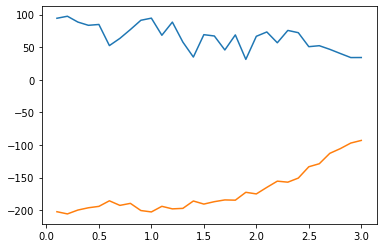

In [9]:
plt.plot(temps,mags), plt.plot(temps, ens)

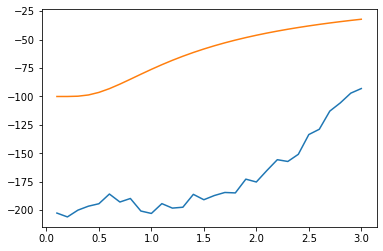

In [10]:
plt.plot(temps, ens)
plt.plot(temps, -100*np.tanh(1/temps))

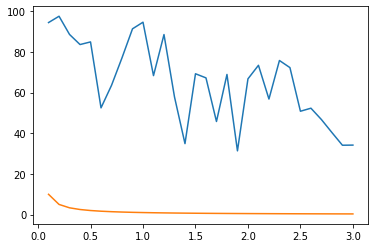

In [11]:
plt.plot(temps, mags)
plt.plot(temps, 100*np.tanh(0.01/temps))

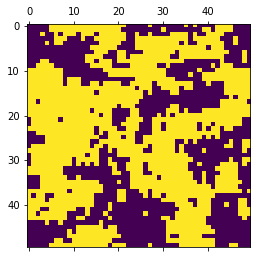

In [12]:
s = random_state((50,50))
metropolis_step(s,2.3,1,0.01,200000)
plt.matshow(s)